In [168]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore') 

In [169]:
df = pd.read_csv('earl694412-infinite-matchhistory1127.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            455 non-null    object 
 1   Player          455 non-null    object 
 2   MatchId         455 non-null    object 
 3   Map             455 non-null    object 
 4   Category        455 non-null    object 
 5   Playlist        455 non-null    object 
 6   Input           455 non-null    object 
 7   Queue           455 non-null    object 
 8   Csr             455 non-null    int64  
 9   Mmr             1 non-null      float64
 10  Outcome         455 non-null    object 
 11  Accuracy        455 non-null    float64
 12  DamageDone      455 non-null    int64  
 13  DamageTaken     455 non-null    int64  
 14  ShotsFired      455 non-null    int64  
 15  ShotsLanded     455 non-null    int64  
 16  ShotsMissed     455 non-null    int64  
 17  KD              455 non-null    flo

In [170]:
df['Date'] = pd.to_datetime(df['Date'])
df['LengthMinutes'] = df['LengthSeconds'] / 60
df['DamageRatio'] = df['DamageDone'] / df['DamageTaken']
df['Kills/10Min'] = (df['Kills'] / df['LengthMinutes']) * 10
df['Deaths/10Min'] = (df['Deaths'] / df['LengthMinutes']) * 10
df['Assists/10Min'] = (df['Assists'] / df['LengthMinutes']) * 10
df['Dmg/10Min'] = (df['DamageDone'] / df['LengthMinutes']) * 10
df['DmgT/10Min'] = (df['DamageTaken'] / df['LengthMinutes']) * 10
df['ExcessKills'] = df['Kills'] - df['ExpectedKills']
df['ExcessDeaths'] = df['ExpectedDeaths'] - df['Deaths']
df['LifetimeKD'] = df['Kills'].cumsum() / df['Deaths'].cumsum()
df['LifetimeDmgRatio'] = df['DamageDone'].cumsum() / df['DamageTaken'].cumsum()

df = df.drop(['Player', 'MatchId', 'Input', 'Queue', 'Mmr'],axis=1)
dfr = df[df['Date']> '2023-01-01']
dfr = dfr[dfr['Playlist'] == 'Ranked Arena']
dfr['Csr'] = dfr['Csr'].replace(0, method='ffill')
dfr = dfr[dfr['Outcome'] != 'Draw']
dfr = dfr[dfr['Outcome'] != 'Left']
dfr['Outcome'] = dfr['Outcome'].map({'Win': 1, 'Loss': 0})
dfr['LifetimeWinRate'] = (dfr['Outcome'].cumsum() / 
                          (dfr['Outcome'].cumsum() + 
                           dfr['Outcome'].eq(0).cumsum())).fillna(0)
dfr = dfr.drop('Playlist', axis=1).reset_index()
dfr.loc[:4, 'Csr'] = 808
dfr.to_csv('df.csv')
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   index             263 non-null    int64         
 1   Date              263 non-null    datetime64[ns]
 2   Map               263 non-null    object        
 3   Category          263 non-null    object        
 4   Csr               263 non-null    int64         
 5   Outcome           263 non-null    int64         
 6   Accuracy          263 non-null    float64       
 7   DamageDone        263 non-null    int64         
 8   DamageTaken       263 non-null    int64         
 9   ShotsFired        263 non-null    int64         
 10  ShotsLanded       263 non-null    int64         
 11  ShotsMissed       263 non-null    int64         
 12  KD                263 non-null    float64       
 13  KDA               263 non-null    float64       
 14  Kills             263 non-

In [171]:
dfr.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,263.0,298.250951,90.859917,140.000000,220.500000,298.000000,374.500000,453.000000
Csr,263.0,932.657795,47.132637,790.000000,903.000000,946.000000,966.000000,1003.000000
Outcome,263.0,0.509506,0.500863,0.000000,0.000000,1.000000,1.000000,1.000000
Accuracy,263.0,51.289886,5.859904,24.390000,48.230000,51.500000,54.415000,80.560000
DamageDone,263.0,4981.855513,1771.015246,347.000000,3771.000000,4669.000000,6162.500000,11536.000000
DamageTaken,263.0,4251.304183,1463.512002,276.000000,3316.000000,4028.000000,5122.500000,9962.000000
ShotsFired,263.0,227.730038,77.718808,16.000000,179.000000,218.000000,284.000000,464.000000
ShotsLanded,263.0,116.650190,40.728754,4.000000,92.000000,110.000000,143.500000,281.000000
ShotsMissed,263.0,111.079848,40.231929,7.000000,84.000000,106.000000,139.000000,261.000000
KD,263.0,1.250038,0.650902,0.000000,0.880000,1.170000,1.455000,6.000000


In [172]:
dfr.tail()

,index,Date,Map,Category,Csr,Outcome,Accuracy,DamageDone,DamageTaken,ShotsFired,...,Kills/10Min,Deaths/10Min,Assists/10Min,Dmg/10Min,DmgT/10Min,ExcessKills,ExcessDeaths,LifetimeKD,LifetimeDmgRatio,LifetimeWinRate
258,449,2023-11-27 04:48:31,Aquarius,Slayer,972,1,52.08,3440,2928,144,...,9.610984,10.983982,9.610984,4723.112128,4020.137300,-3.0,2.0,1.120216,1.155225,0.509653
259,450,2023-11-27 04:59:21,Solitude,Strongholds,980,0,52.19,7000,6719,297,...,13.507109,15.639810,8.530806,4976.303318,4776.540284,1.0,-2.0,1.119130,1.154790,0.507692
260,451,2023-11-27 05:17:15,Aquarius,Slayer,972,1,48.55,6465,5341,311,...,11.428571,11.428571,5.714286,5277.551020,4360.000000,-3.0,2.0,1.118810,1.154959,0.509579
261,452,2023-11-27 05:30:55,Live Fire,Extraction,980,0,57.71,4489,3104,175,...,17.371938,14.699332,4.008909,5998.663697,4147.884187,3.0,-1.0,1.118943,1.155473,0.507634
262,453,2023-11-27 05:42:48,Streets,Extraction,972,1,59.31,4791,3658,204,...,18.867925,11.320755,8.805031,6026.415094,4601.257862,4.0,2.0,1.119885,1.155794,0.509506


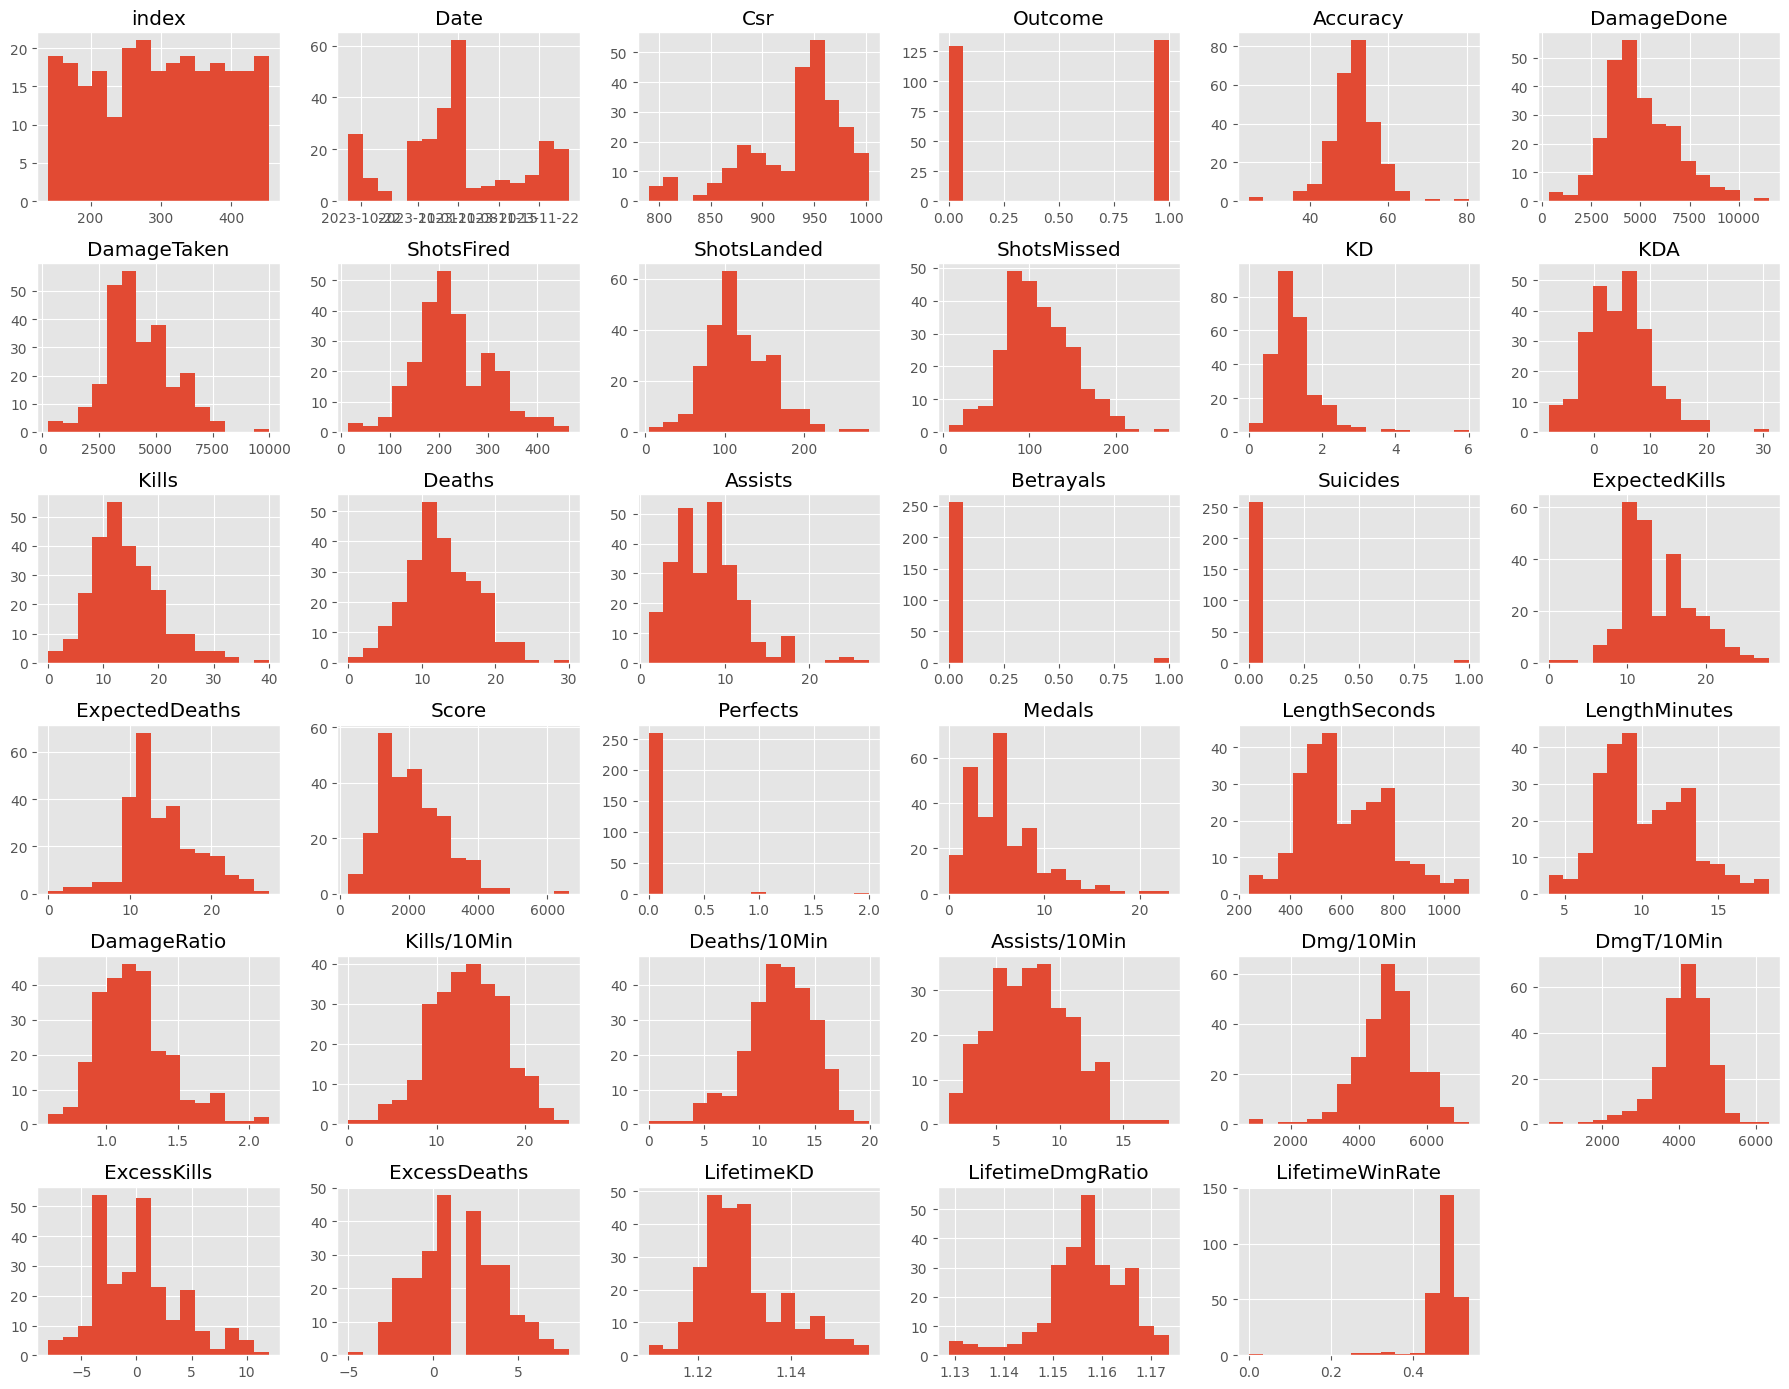

In [173]:
dfr.hist(bins=15, figsize=(18, 14))
plt.tight_layout()
plt.show()

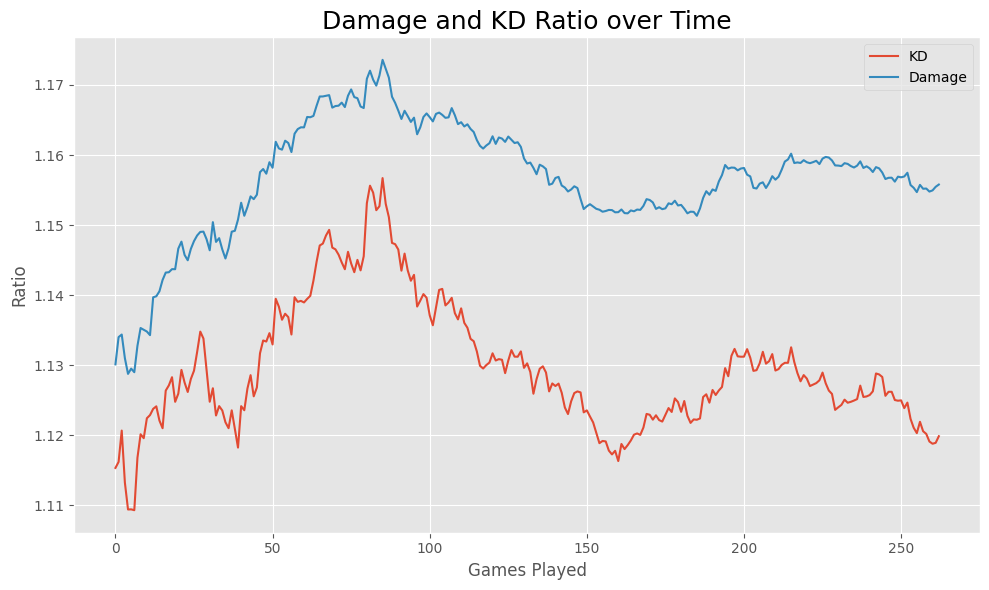

In [174]:
plt.figure(figsize=(10,6))
plt.plot(dfr['LifetimeKD'], label='KD' )
plt.plot(dfr['LifetimeDmgRatio'], label='Damage')
plt.title('Damage and KD Ratio over Time', fontsize=18)
plt.xlabel('Games Played')
plt.ylabel('Ratio')
plt.legend()
plt.tight_layout()
plt.savefig('Plots/DamKDRatios.png', dpi=300)
plt.show()

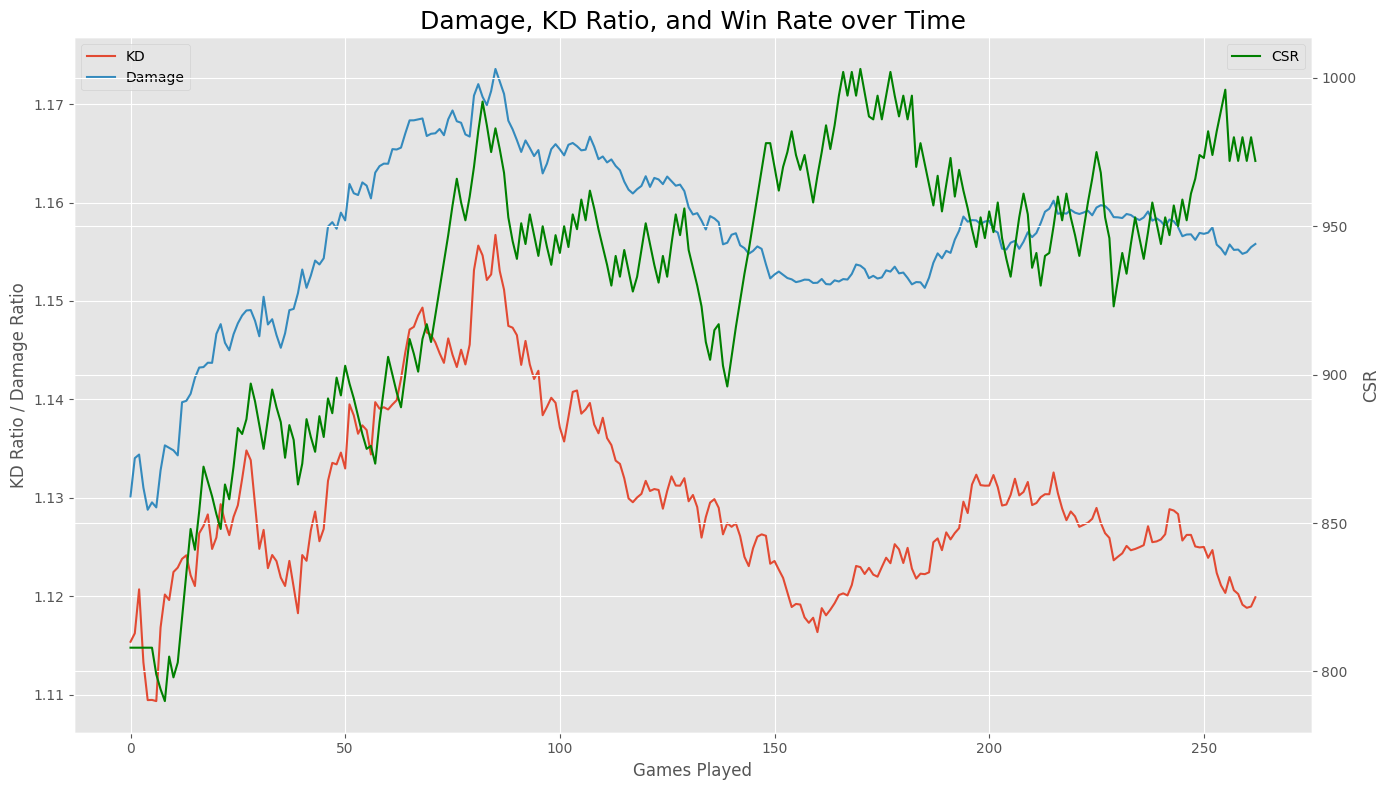

In [175]:
# Smooth the LifetimeWinRate using a 10-game moving average
# dfr['SmoothedWinRate'] = dfr['LifetimeWinRate'].rolling(window=15).mean()

plt.figure(figsize=(14,8))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(dfr['LifetimeKD'], label='KD' )
ax1.plot(dfr['LifetimeDmgRatio'], label='Damage')
ax2.plot(dfr['Csr'], color='green', label='CSR')
ax1.set_title('Damage, KD Ratio, and Win Rate over Time', fontsize=18)
ax1.set_xlabel('Games Played')
ax1.set_ylabel('KD Ratio / Damage Ratio')
ax2.set_ylabel('CSR')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.savefig('Plots/DamKDRatiosCsr.png', dpi=300)
plt.show()

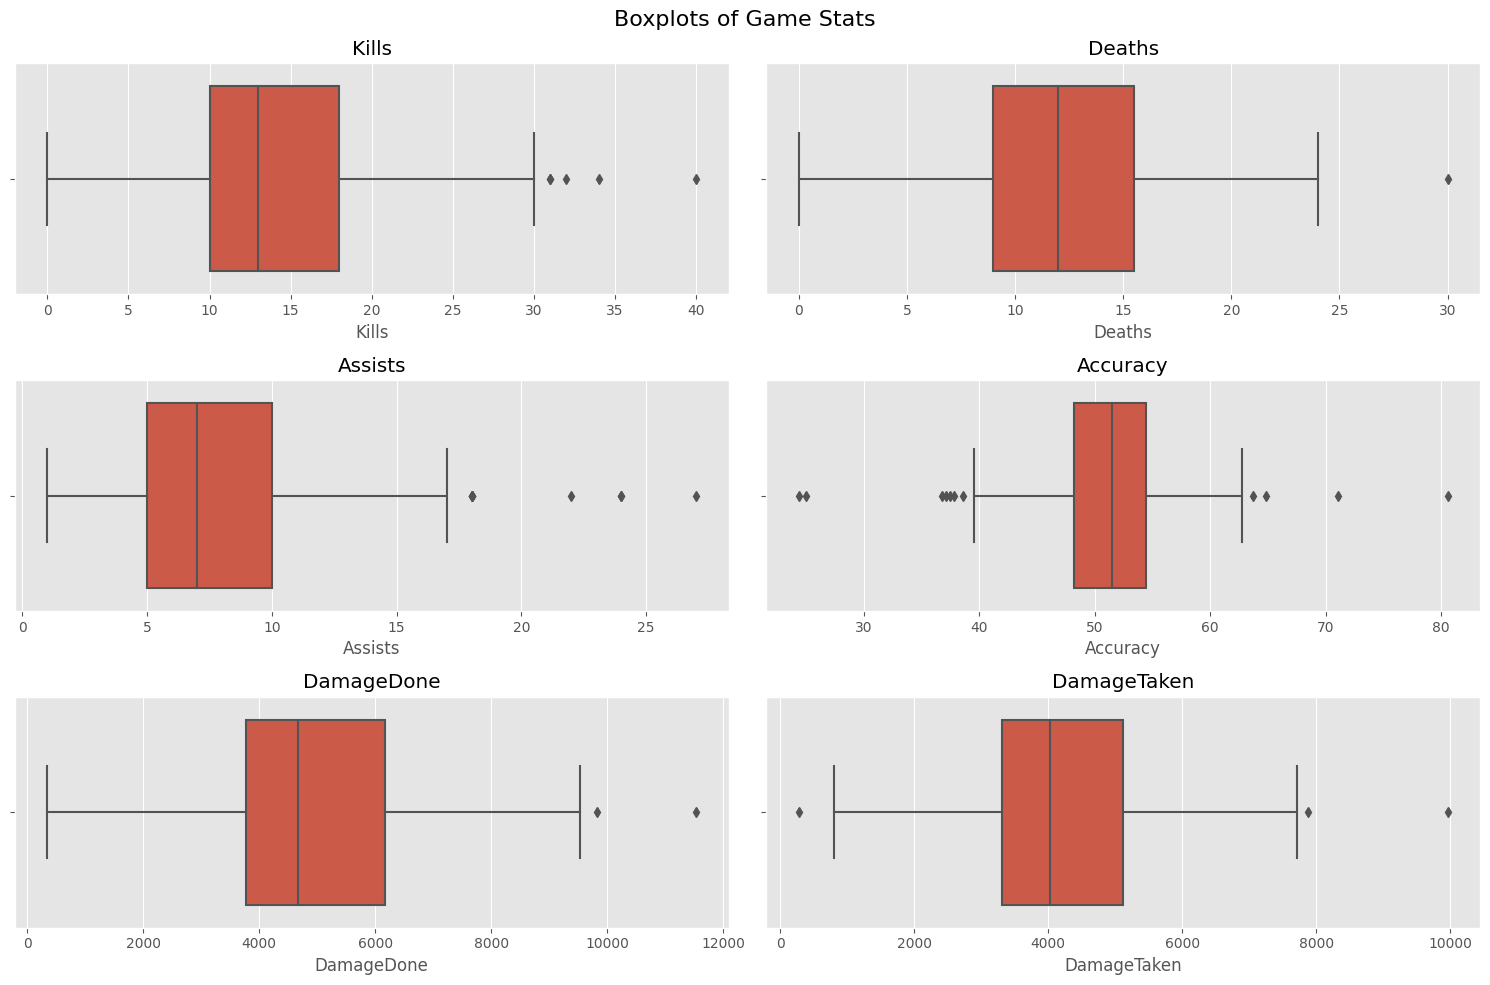

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt
columns = ['Kills', 'Deaths', 'Assists', 'Accuracy', 'DamageDone', 'DamageTaken']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot each column in a separate boxplot
for i, column in enumerate(columns):
    sns.boxplot(x=dfr[column], ax=axes[i])
    axes[i].set_title(column)

# Adjust layout
plt.suptitle('Boxplots of Game Stats', fontsize=16)
plt.tight_layout()
plt.savefig('Plots/Boxplots.png', dpi=300)
plt.show()


In [177]:
over = 5

dfover = dfr.loc[dfr['Deaths'] < over, 
                ['Kills', 'Deaths', 'KD', 'DamageDone', 'DamageTaken', 'DamageRatio', 'Outcome']
                ].sort_values('DamageDone', ascending=False)

# print(dfover.head())
print(f'Overall KD: {round(dfover["Kills"].sum() / dfover["Deaths"].sum(),2)}')
print(f"Damage Ratio: {round(dfover['DamageDone'].sum() / dfover['DamageTaken'].sum(),2)}")
print(f"Win-Loss: {(dfover['Outcome']==1).sum()}-{(dfover['Outcome']==0).sum()}")

Overall KD: 2.5
Damage Ratio: 1.49
Win-Loss: 13-0


In [178]:
dfw = dfr.loc[dfr['Outcome'] == 1, 
                ['Kills', 'Deaths', 'KD', 'DamageDone', 'DamageTaken', 'DamageRatio', 'Outcome']
                ].sort_values('Kills', ascending=False)

dfl = dfr.loc[dfr['Outcome'] == 0, 
                ['Kills', 'Deaths', 'KD', 'DamageDone', 'DamageTaken', 'DamageRatio', 'Outcome']
                ].sort_values('Kills', ascending=False)

print('Wins')
print(f'Overall KD: {round(dfw["Kills"].sum() / dfw["Deaths"].sum(),2)}')
print(f"Average Kills: {round(dfw['Kills'].mean(),2)}")
print(f"Average Deaths: {round(dfw['Deaths'].mean(),2)}")
print(f"Average Damage Done: {round(dfw['DamageDone'].mean(),)}")
print(f"Average Damage Taken: {round(dfw['DamageTaken'].mean(),)}")
print(f"Damage Ratio: {round(dfw['DamageDone'].sum() / dfw['DamageTaken'].sum(),2)}")
print(f"Win-Loss: {(dfw['Outcome']==1).sum()}-{(dfw['Outcome']==0).sum()}")
print('\n')
print('Losses')
print(f'Overall KD: {round(dfl["Kills"].sum() / dfl["Deaths"].sum(),2)}')
print(f"Average Kills: {round(dfl['Kills'].mean(),2)}")
print(f"Average Deaths: {round(dfl['Deaths'].mean(),2)}")
print(f"Average Damage Done: {round(dfl['DamageDone'].mean(),)}")
print(f"Average Damage Taken: {round(dfl['DamageTaken'].mean(),)}")
print(f"Damage Ratio: {round(dfl['DamageDone'].sum() / dfl['DamageTaken'].sum(),2)}")
print(f"Win-Loss: {(dfl['Outcome']==1).sum()}-{(dfl['Outcome']==0).sum()}")

Wins
Overall KD: 1.3
Average Kills: 13.63
Average Deaths: 10.46
Average Damage Done: 4759
Average Damage Taken: 3868
Damage Ratio: 1.23
Win-Loss: 134-0


Losses
Overall KD: 1.03
Average Kills: 14.5
Average Deaths: 14.04
Average Damage Done: 5213
Average Damage Taken: 4650
Damage Ratio: 1.12
Win-Loss: 0-129


In [179]:
mapCatKD = dfr.pivot_table(index=['Map', 'Category'], 
                        values=['Kills', 'Deaths', 'Accuracy', 'KD', 'DamageRatio', 'Outcome'], 
                        aggfunc='mean')

desired_col_order = ['Kills', 'Deaths', 'KD', 'Accuracy', 'DamageRatio', 'Outcome']

# Reindex the pivot table with the desired column order
mapCatKD = mapKD.reindex(desired_col_order, axis=1)
mapCatKD = mapCatKD.round(2)

mapCatKD

,Kills,Deaths,KD,Accuracy,DamageRatio,Outcome
Map,,,,,,
Aquarius,15.00,11.65,1.37,51.51,1.27,0.52
Argyle,12.50,11.30,1.12,48.78,1.21,0.30
Empyrean,13.33,12.22,1.10,49.73,1.17,0.33
Forbidden,13.00,9.12,1.57,52.73,1.41,0.62
Live Fire,12.66,12.04,1.22,51.72,1.12,0.51
Recharge,15.28,13.00,1.26,49.90,1.20,0.53
Solitude,15.09,12.71,1.26,51.21,1.19,0.42
Streets,14.05,11.90,1.28,52.81,1.21,0.57


In [180]:
mapKD = dfr.pivot_table(index='Map', 
                        values=['Kills', 'Deaths', 'Assists', 'Accuracy', 'KD', 'DamageRatio', 'Outcome'], 
                        aggfunc='mean')

desired_col_order = ['Kills', 'Deaths', 'KD', 'Assists', 'Accuracy', 'DamageRatio', 'Outcome']

# Reindex the pivot table with the desired column order
mapKD = mapKD.reindex(desired_col_order, axis=1)
mapKD = mapKD.round(2)

mapKD

,Kills,Deaths,KD,Assists,Accuracy,DamageRatio,Outcome
Map,,,,,,,
Aquarius,14.73,11.61,1.34,7.52,51.43,1.26,0.55
Argyle,12.50,11.30,1.12,5.80,48.78,1.21,0.30
Empyrean,12.64,13.09,1.00,8.18,48.88,1.13,0.36
Forbidden,13.60,9.60,1.56,5.10,53.81,1.39,0.70
Live Fire,12.69,12.24,1.20,6.76,52.14,1.11,0.50
Recharge,15.23,12.90,1.27,9.27,49.87,1.21,0.54
Solitude,15.00,12.89,1.24,8.45,51.11,1.18,0.43
Streets,13.89,11.78,1.25,9.02,52.36,1.21,0.59


In [181]:
catKD = dfr.pivot_table(index='Category', 
                        values=['Kills', 'Deaths', 'Accuracy', 'KD', 'DamageRatio', 'Outcome'], 
                        aggfunc='mean')

desired_col_order = ['Kills', 'Deaths', 'KD', 'Accuracy', 'DamageRatio', 'Outcome']

# Reindex the pivot table with the desired column order
catKD = catKD.reindex(desired_col_order, axis=1)
catKD = catKD.round(2)

catKD

,Kills,Deaths,KD,Accuracy,DamageRatio,Outcome
Category,,,,,,
CTF 3 Captures,12.90,11.39,1.22,50.44,1.24,0.45
CTF 5 Captures,21.00,16.00,1.39,51.32,1.28,0.25
Extraction,13.20,10.56,1.38,53.64,1.26,0.49
King of the Hill,16.42,14.09,1.26,52.40,1.13,0.61
Oddball,16.18,15.00,1.14,51.07,1.19,0.50
Slayer,10.26,9.67,1.22,49.82,1.15,0.61
Strongholds,16.82,14.10,1.23,51.43,1.19,0.40
